# Linear Regression 

### Importing the libraries 

In [1]:
# prerequisites 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading and Preprocessing the Data

In [2]:
# Reading the data
df = pd.read_csv('train_data/Lineardata_train.csv')

# Converting pandas to numpy
data = df.to_numpy()

# Separating features and target variable
x_training = data[:, 1:]
y_train_data = data[:, 0]

df

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-7567.227845,2.029910,-0.928164,-2.463563,5.312071,2.070290,0.835355,-4.421930,18.292309,-10.357047,...,-2.827488,17.940836,25.724137,-29.713820,0.625372,-183.410260,19.439815,6.640099,-41.093484,-1.010290
49996,-9973.851789,-0.223475,0.341542,-4.423256,-0.104668,4.384320,-2.290826,4.612476,29.667901,-9.675776,...,-17.744738,-0.708422,15.907878,10.865072,-31.280568,-354.186800,6.363459,0.370644,35.952861,3.752642
49997,-8246.697221,-0.321085,1.608386,-11.177100,-1.140550,-10.832891,-8.625981,-27.740091,-14.166217,9.169728,...,3.841781,-17.941987,-2.167623,11.336067,-2.542123,-98.327808,-13.690353,-4.299753,16.053032,14.812715
49998,-9101.101377,-2.383432,1.214911,0.925113,0.017874,2.022561,1.209647,5.006908,-12.043059,-5.756141,...,5.308136,12.387029,20.220357,-1.359887,83.958829,-314.127483,-2.550699,-5.082801,7.514089,30.150485


### Visualizing the data 

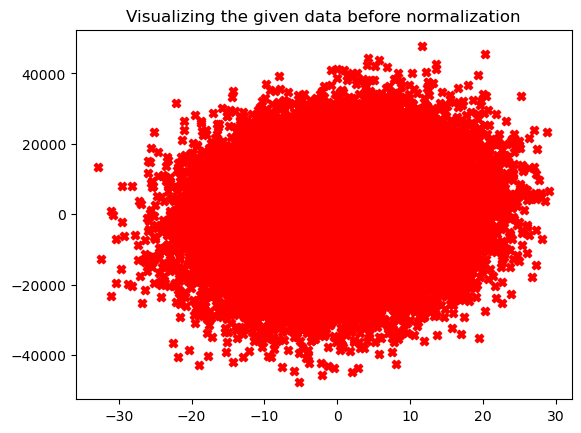

In [3]:
# Visualizing the data before normalization
plt.scatter(x_training[:, 11], y_train_data, marker='X', c='r')
plt.title("Visualizing the given data before normalization")
plt.show()

## Defining all the required functions 

In [4]:
def compute_cost(x,y,w,b):
    return (np.sum((np.matmul(x,w.T)+b-y)**2))/(2*x.shape[0])

def compute_gradient(x,y,w,b):
    variab = (np.dot(x,w.T)+b-y) #where variable = w.x+b-y
    m,n=x.shape #where m = number of observations and n = number of features
    dj_db = np.mean(variab,axis=0)
    dj_dw = (np.dot(variab.T,x))/x.shape[0]
    return dj_dw,dj_db

def z_score_normalization(x):
    mean_values = np.mean(x, axis=0)
    std_deviation = np.std(x, axis=0)
    z_score_normalized_data = (x - mean_values) / std_deviation
    return z_score_normalized_data , mean_values , std_deviation

def gradient_descent(x,y,w,b,alpha,num_iter):
    
    cost_his = ["starting"]
    for i in range(num_iter): 
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w-=alpha*dj_dw
        b-=alpha*dj_db
        if i%(num_iter//10)==0:
            print(f'Cost for {i}th iteration = {cost_his[i]}')
        cost_his.append(compute_cost(x,y,w,b))
    return w,b,cost_his

def plotting_costVSnum_iter(cost,num_iter):
    plt.title("Cost VS number of iterations graph")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost (error)")
    plt.plot(np.arange(0,num_iter),cost)
    plt.show()

def R2score(y_actual, y_predicted):
    y_mean_of_actual = np.mean(y_actual)
    a = np.sum(np.square(y_actual - y_predicted))
    b = np.sum(np.square(y_actual - y_mean_of_actual))
    R2 = 1 - (a / b)
    return R2

### Data Normalization

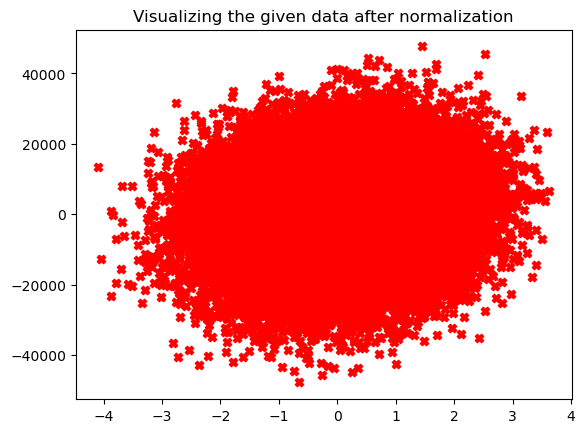

In [5]:
# Using Z-score normalization
x_train_data,mean,std_deviation = z_score_normalization(x_training)

# Plotting the graph after normalization
plt.scatter(x_train_data[:, 11], y_train_data, marker='X', c='r')
plt.title("Visualizing the given data after normalization")
plt.show()

## Splitting the data into cross validation set and training set

In [6]:
x_train = x_train_data[:45000,:]

#cross validation set
x_cv = x_train_data[45000:,:]
y_cv = y_train_data[45000:].reshape(-1,1)

y_train = y_train_data[:45000].reshape(-1,1)

## Applying gradient descent

Cost for 0th iteration = starting
Cost for 10th iteration = 64278452.98206964
Cost for 20th iteration = 63000994.83478369
Cost for 30th iteration = 61748932.83572232
Cost for 40th iteration = 60521761.94122842
Cost for 50th iteration = 59318987.15449287
Cost for 60th iteration = 58140123.32562806
Cost for 70th iteration = 56984694.95572096
Cost for 80th iteration = 55852236.00478675
Cost for 90th iteration = 54742289.70354525


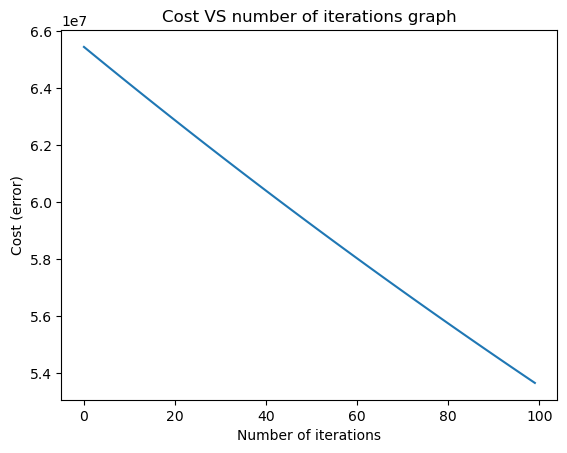

^^^^^^^^^^^^^For alpha = 0.001^^^^^^^^^^^^^^^^^
Cost for 0th iteration = starting
Cost for 10th iteration = 61745193.14775199
Cost for 20th iteration = 58133081.56147294
Cost for 30th iteration = 54732345.05666966
Cost for 40th iteration = 51530610.461859636
Cost for 50th iteration = 48516229.112990335
Cost for 60th iteration = 45678234.41697985
Cost for 70th iteration = 43006301.90165085
Cost for 80th iteration = 40490711.60633242
Cost for 90th iteration = 38122312.67594826


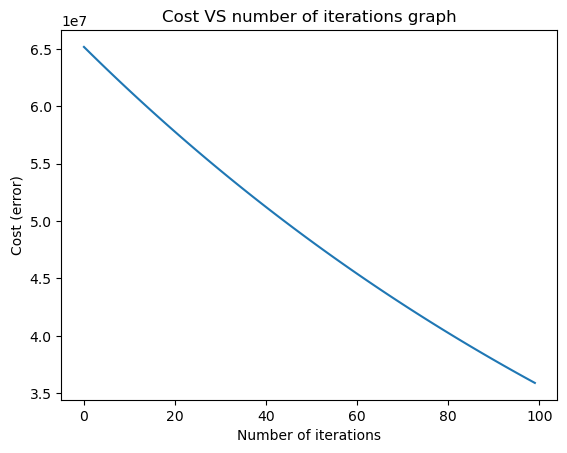

^^^^^^^^^^^^^For alpha = 0.003^^^^^^^^^^^^^^^^^
Cost for 0th iteration = starting
Cost for 10th iteration = 53605461.73058174
Cost for 20th iteration = 43816779.91780156
Cost for 30th iteration = 35816053.650848284
Cost for 40th iteration = 29276614.962615084
Cost for 50th iteration = 23931495.796256866
Cost for 60th iteration = 19562514.656233806
Cost for 70th iteration = 15991358.795296287
Cost for 80th iteration = 13072296.949818995
Cost for 90th iteration = 10686224.41083726


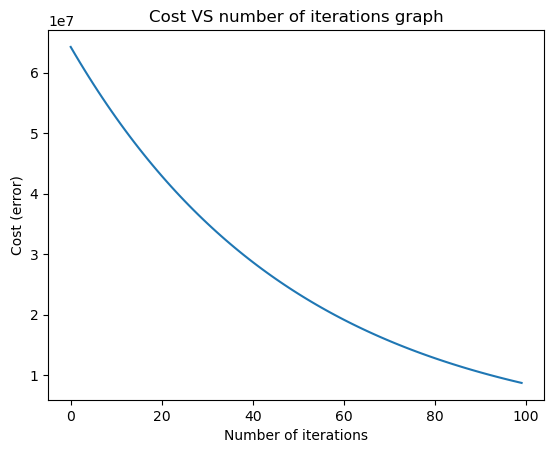

^^^^^^^^^^^^^For alpha = 0.01^^^^^^^^^^^^^^^^^
Cost for 0th iteration = starting
Cost for 10th iteration = 35594548.817889616
Cost for 20th iteration = 19321391.65058888
Cost for 30th iteration = 10489340.33715097
Cost for 40th iteration = 5695249.643238135
Cost for 50th iteration = 3092659.5844435967
Cost for 60th iteration = 1679601.2147513842
Cost for 70th iteration = 912294.1425020888
Cost for 80th iteration = 495585.01947652234
Cost for 90th iteration = 269250.1523890373


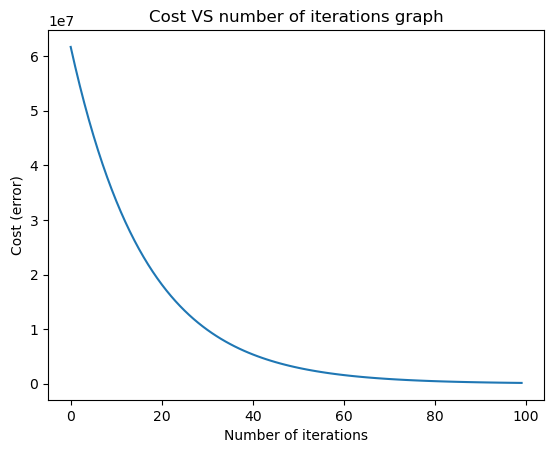

^^^^^^^^^^^^^For alpha = 0.03^^^^^^^^^^^^^^^^^
Cost for 0th iteration = starting
Cost for 10th iteration = 7922780.061413291
Cost for 20th iteration = 958691.9943312134
Cost for 30th iteration = 116194.35942050321
Cost for 40th iteration = 14105.60311701936
Cost for 50th iteration = 1715.122062262457
Cost for 60th iteration = 208.87989928983964
Cost for 70th iteration = 25.482871397238426
Cost for 80th iteration = 3.117592837427573
Cost for 90th iteration = 0.3858881460279278


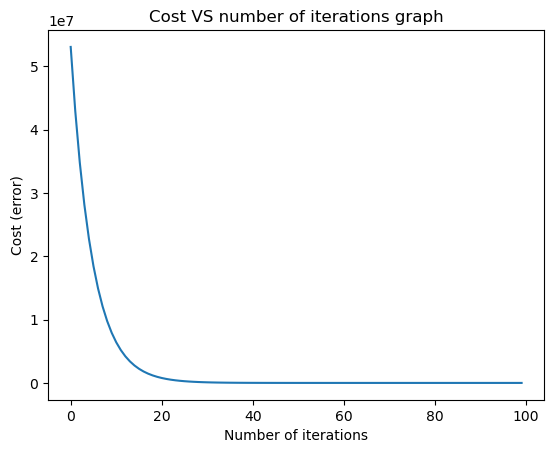

^^^^^^^^^^^^^For alpha = 0.1^^^^^^^^^^^^^^^^^
Cost for 0th iteration = starting
Cost for 10th iteration = 51500.168074114175
Cost for 20th iteration = 41.42312162272658
Cost for 30th iteration = 0.03913661558620387
Cost for 40th iteration = 0.0050826491839168425
Cost for 50th iteration = 0.005054012363633572
Cost for 60th iteration = 0.0050539877903336755
Cost for 70th iteration = 0.005053987768848605
Cost for 80th iteration = 0.005053987768831384
Cost for 90th iteration = 0.005053987768830622


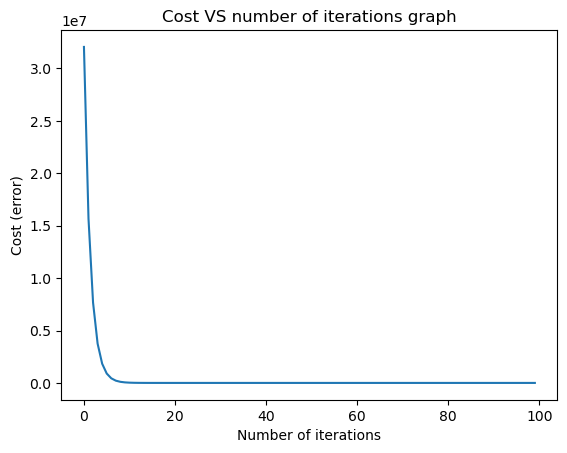

^^^^^^^^^^^^^For alpha = 0.3^^^^^^^^^^^^^^^^^


In [7]:
# Checking the alpha by observing minimum cost value and observing the graph
alpha_values = [0.001, 0.003, 0.01,0.03,0.1,0.3]

for alpha in alpha_values:
    w = np.zeros((1,x_train.shape[1]))
    b = np.array([[0.0]])
    num_iter = 100
    
    w_n, b_n, cost_n = gradient_descent(x_train, y_train, w, b, alpha, num_iter)
    cost_n = np.array(cost_n[1:])
    # Plotting cost vs. num_iter
    plotting_costVSnum_iter(cost_n, num_iter)
    
    # Displaying the minimum cost value
    print(f"^^^^^^^^^^^^^For alpha = {alpha}^^^^^^^^^^^^^^^^^")

In [ ]:
# Optimal alpha
import time
s = time.time()
alpha = 0.3
w = np.zeros((1, x_train.shape[1]))
b = np.array([[0.0]])
num_iter = 1000
w_n, b_n, cost_n = gradient_descent(x_train, y_train, w, b, alpha, num_iter)
cost_n = np.array(cost_n[1:])
print(f"Time Taken = {(time.time()-s)} sec")

Cost for 0th iteration = starting
Cost for 100th iteration = 0.005053987768831164
Cost for 200th iteration = 0.005053987768831513
Cost for 300th iteration = 0.005053987768831513


### Visualizing Actual vs. Predicted Values

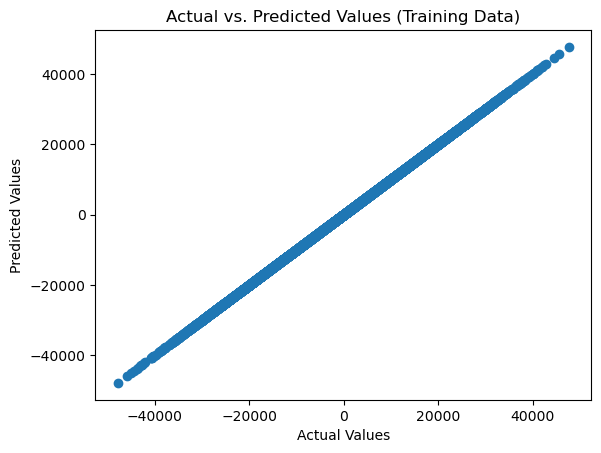

In [9]:
# Plotting the actual vs. predicted values
y_predicted = np.matmul(x_train, w_n.T) + b_n
plt.scatter(y_train, y_predicted)
plt.title("Actual vs. Predicted Values (Training Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### Evaluating Model Accuracy with R2 Score on training data and Cross validation data

In [10]:
# Using R2 score method to check the accuracy of the trained model
r2 = R2score(y_train, y_predicted)
print(f"R2 Score: {r2}")

# Using R2 score method to check the accuracy of the cross validation set 
y_predicted_cv = np.matmul(x_cv, w_n.T) + b_n
r2 = R2score(y_cv, y_predicted_cv)
print(f"R2 Score: {r2}")

R2 Score: 0.9999999999229305
R2 Score: 0.9999999999226438


### Making Predictions on Test Data and Saving Results

In [11]:
# Reading test data
tes_data = pd.read_csv('test_data/Lineardata_test.csv')
test_data = tes_data.to_numpy()

# Normalizing test data
x_test2 = test_data[:, 1:]
x_test = (x_test2-mean)/std_deviation

# Making predictions
y_prediceted = np.matmul(x_test, w_n.T) + b_n

# Creating the final dataframe
final_data = np.zeros((10000, 2))
final_data[:, 0] = test_data[:, 0]
final_data[:, 1] = y_prediceted[:,0]

df2 = pd.DataFrame(final_data)
df2.columns = ["ID's", 'Predictions']

# Saving predictions to CSV
df2.to_csv('predicted_data/Lineardata_predicted_final.csv', index=False)